In [ ]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import xgboost as xgb

In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/datasets/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
def counterTable():
  print("Rows:", heart.shape[0], "| Columns:",heart.shape[1])

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
heart.drop_duplicates(inplace=True)

In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


96 206


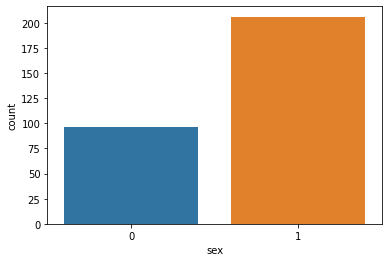

In [ ]:
x = (heart.sex.value_counts())  
print(x[0], x[1])
p = sns.countplot(data = heart, x = "sex")
plt.show()

0    257
1     45
Name: fbs, dtype: int64


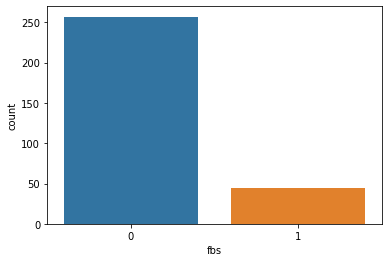

In [ ]:
x = (heart.fbs.value_counts())
print(x)
p = sns.countplot(data = heart, x = "fbs")
plt.show()

<Figure size 720x720 with 0 Axes>

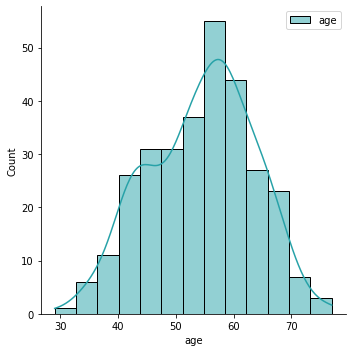

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="#27a2a8", label="age", kde=True)
plt.legend()

<Figure size 1440x1440 with 0 Axes>

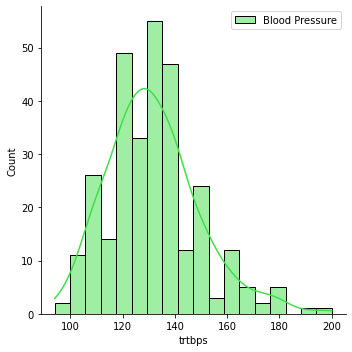

In [ ]:
plt.figure(figsize=(20, 20))
sns.displot(heart.trtbps, color="#40de4b", label="Blood Pressure", kde=True)
plt.legend()

<Figure size 1440x1440 with 0 Axes>

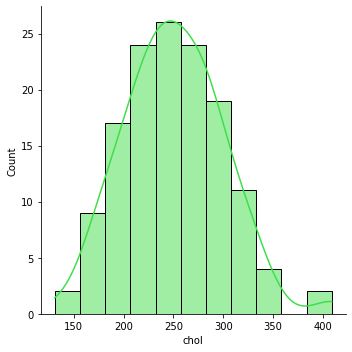

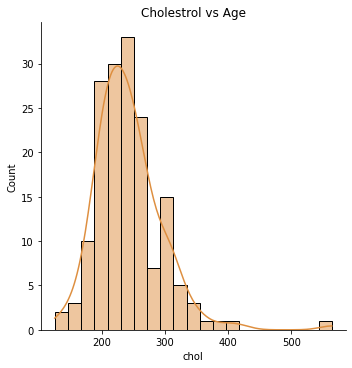

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(heart[heart['output'] == 0]["chol"], color="#40de4b", kde=True,)
sns.displot(heart[heart['output'] == 1]["chol"], color="#de8f40", kde=True)
plt.title('Cholestrol vs Age')
plt.show()



---


# **Data Processing**




In [ ]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)

Training data: (241, 12) (241,)
Testing data: (61, 12) (61,)


**Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

# **Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)

print("Matrix: \n", conf)
print("Accuracy:", accuracy_score(y_test, predicted)*100, "%")

Matrix: 
 [[23  4]
 [ 3 31]]
Accuracy: 88.52459016393442 %


# **Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predicted)*100, "%")

Accuracy: 88.52459016393442 %


**Bernoulli Naive Bayes**

In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predicted)*100, "%")

Accuracy: 86.88524590163934 %


**Support Vector Machine**

In [ ]:
model = SVC()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predicted)*100, "%")

Accuracy: 91.80327868852459 %


**Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators= 100, random_state= 0)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predicted.round())*100, "%")

Accuracy: 85.24590163934425 %


**K Nearest Neighbours**

In [ ]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print(confusion_matrix(y_test, predicted))
print("Accuracy:", accuracy_score(y_test, predicted.round())*100, "%")

[[23  4]
 [ 6 28]]
Accuracy: 83.60655737704919 %


**Optimizing the KNN**

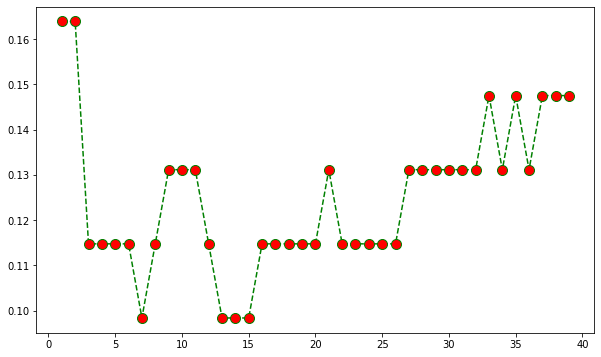

In [ ]:
error_rate = []

for i in range(1, 40):

  model = KNeighborsClassifier(n_neighbors= i)
  model.fit(x_train, y_train)
  pred_i = model.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="green", linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)

predicted = model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predicted))
print("Accuracy: ", accuracy_score(y_test, predicted.round())*100, "%")

[[25  2]
 [ 4 30]]
Accuracy:  90.1639344262295 %


**X Grandient Boosting**

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)

predicted = model.predict(x_test)

cm = confusion_matrix(y_test, predicted)
print(cm)
print("Accuracy:", accuracy_score(y_test, predicted)*100, "%")

[[22  5]
 [ 5 29]]
Accuracy: 83.60655737704919 %
